In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

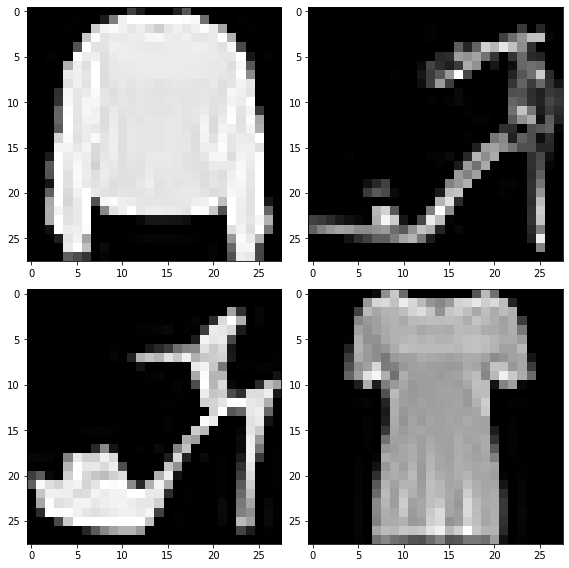

In [3]:
fig, axs = plt.subplots(2,2,figsize = (8,8))

for idx, ax in enumerate(axs.flatten()):
    _ = ax.imshow(train_images[idx+7], cmap ="gray")
plt.tight_layout()
plt.show()

In [4]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
train_images = (train_images/255)
test_images = (test_images/255)

In [6]:
model = Sequential([Flatten(input_shape = (28,28)),
                    Dense(128, activation = "relu"),
                    Dense(10, activation="softmax"),])

In [7]:
model.compile(optimizer=Adam(),
              loss=sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4999 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3724 - accuracy: 0.8657
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3374 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3137 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2957 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2818 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2686 - accuracy: 0.8993
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2586 - accuracy: 0.9035
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2492 - accuracy: 0.9062
Epoch 10/10
60

In [9]:
test_labels_names = list(map(lambda x: class_name[x], test_labels))

In [10]:
y_hat = model.predict(test_images)
y_hat = list(map(lambda x: class_name[np.argmax(x)],y_hat))

In [11]:
print(classification_report(test_labels_names, y_hat))

              precision    recall  f1-score   support

  Ankle boot       0.96      0.96      0.96      1000
         Bag       0.99      0.96      0.97      1000
        Coat       0.79      0.82      0.80      1000
       Dress       0.82      0.94      0.88      1000
    Pullover       0.84      0.73      0.78      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.95      0.96      0.95      1000
 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.98      0.98      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [12]:
y_hat_v2 = model.predict_classes(test_images)
y_hat_v2 = list(map(lambda x: class_name[x],y_hat_v2))

In [13]:
print(classification_report(test_labels_names, y_hat_v2))

              precision    recall  f1-score   support

  Ankle boot       0.96      0.96      0.96      1000
         Bag       0.99      0.96      0.97      1000
        Coat       0.79      0.82      0.80      1000
       Dress       0.82      0.94      0.88      1000
    Pullover       0.84      0.73      0.78      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.95      0.96      0.95      1000
 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.98      0.98      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000

